In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5) 
#일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno as msno # 결측치를 시각화 해서 보여 준다

#주의사항 무시
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

# 과정
- 데이터셋 확인 
    - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
- 탐색적 데이터 분석(exploratory data analysis) 
    - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
- feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
- model 만들기 
    - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
- 모델 학습 및 예측 
    - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
- 모델 평가 
    - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

## 1. 데이터셋 확인

In [5]:
# 데이터 불러와서 변수에 담기
df_train = pd.read_csv('./data/train.csv')
df_test  = pd.read_csv('./data/test.csv')

In [6]:
# 데이터 앞부분 확인
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- feature은 내가 알고싶은 정보를 알기 위해 필요한 특징들을 의미한다! 
- ex) 고양이 종류를 알고싶다 -> 털 길이 정보, 눈의 색깔, 다리 길이 등...
- target_label -> 내가 알려고 하는 값

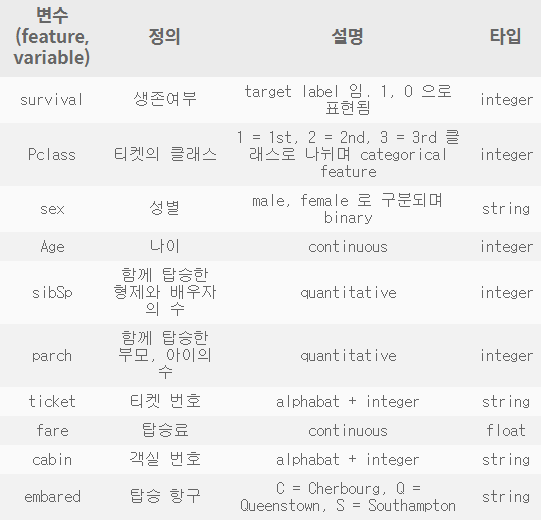

In [7]:
# .describe() 메소드는 생성했던 DataFrame 의 간단한 통계 정보를 보여줍니다.
# 컬럼별로 데이터의 개수(count), 데이터의 평균값(mean), 표준 편차(std), 
# 최솟값(min), 4분위수(25%, 50%, 75%), 그리고 최댓값(max)을 알 수 있다.
# https://dandyrilla.github.io/2017-08-12/pandas-10min/
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
df_test.describe()
#train과 비교해서 Survived  열(feature)가 없다

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

## 1.1 Null data check

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
# 트레인 데이터의 컬럼들을 한 개씩 넣어서 그 퓨쳐의 NaN값의 퍼센트를 출력해준다

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
# 테스트 데이터의 컬럼들을 한 개씩 넣어서 그 퓨쳐의 NaN값의 퍼센트를 출력해준다

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


####  Cabin, Age에 각각 결측치 존재 
#### MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다
- msno.matrix와 msno.bar의 시각화 차이점 확인

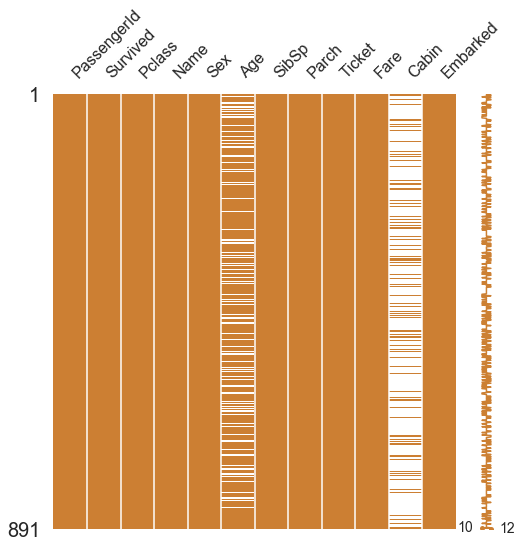

In [11]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))
# figsize는 그림의 크기를 지정한다
# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html 참조

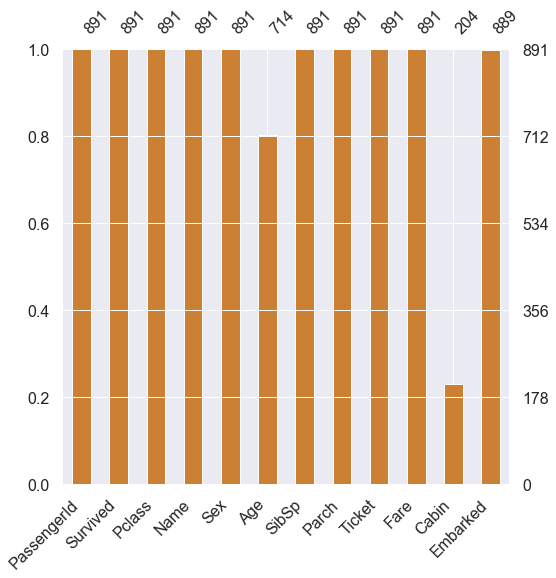

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

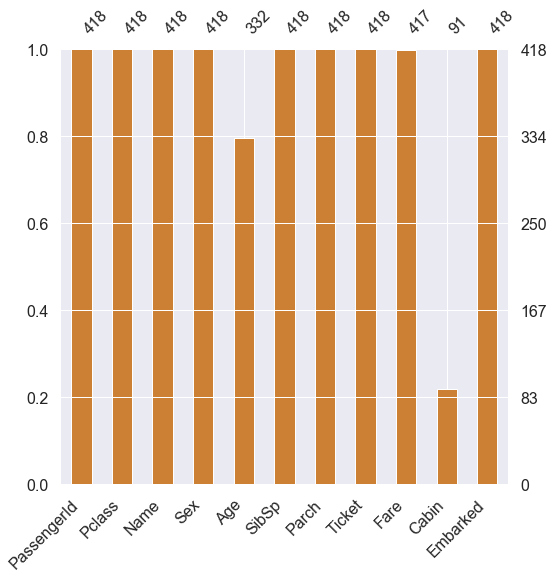

In [13]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target label 확인
- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다

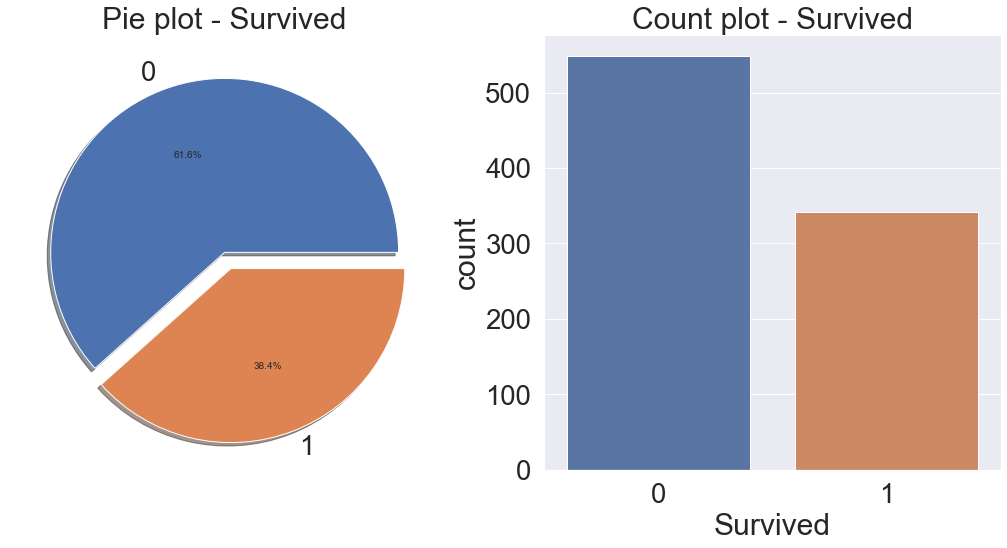

In [31]:
# 한번에 여러 그래프를 보여주기 위해 사용되는 코드 -> subplots
# 'https://m.blog.naver.com/PostView.nhn?blogId=heygun&
# logNo=221520454294&proxyReferer=https:%2F%2Fwww.google.com%2F'참조

f, ax = plt.subplots(1, 2, figsize=(18, 8)) 
#(1,2)는 가로 한 줄, 세로 2개를 의미한다 

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [15]:
# Q1.ax는 무엇?  2개의 그래프 중 [0]번에 존재하는 그래프 여기서는 원형 그래프

## 2. Exploratory data analysis
- 데이터 시각화 하기
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다.

## 2.1 Pclass
-  Pclass 는 ordinal, 서수형 데이터. 카테고리이면서, 순서가 있는 데이터 타입
- 생존률의 차이를 살펴보기. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있다. 또한 pivot 이라는 메소드도 있다.
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶는다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나온다.
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 된다

In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
# 각 클래스별 구성원 수
# as_index=True를 해주는 이유! Pclass를 기준으로 만든다

Survived
Pclass          
1            216
2            184
3            491

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# 각 클래스별 생존자 수

Survived
Pclass          
1            136
2             87
3            119

In [18]:
# pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).\
style.background_gradient(cmap='summer_r')
# margins는 합계의 여부이다

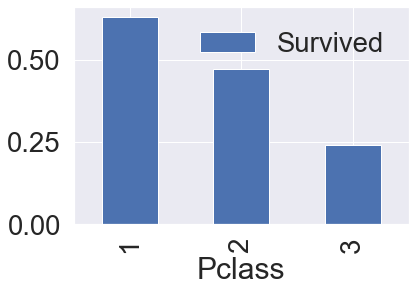

In [19]:
# grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률 확인 가능 
# class 1 이면 아래와 같습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar()

### Pclass가 좋을 수록 생존률이 높다
### seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있다 -> 더 쉽게 확인 가능

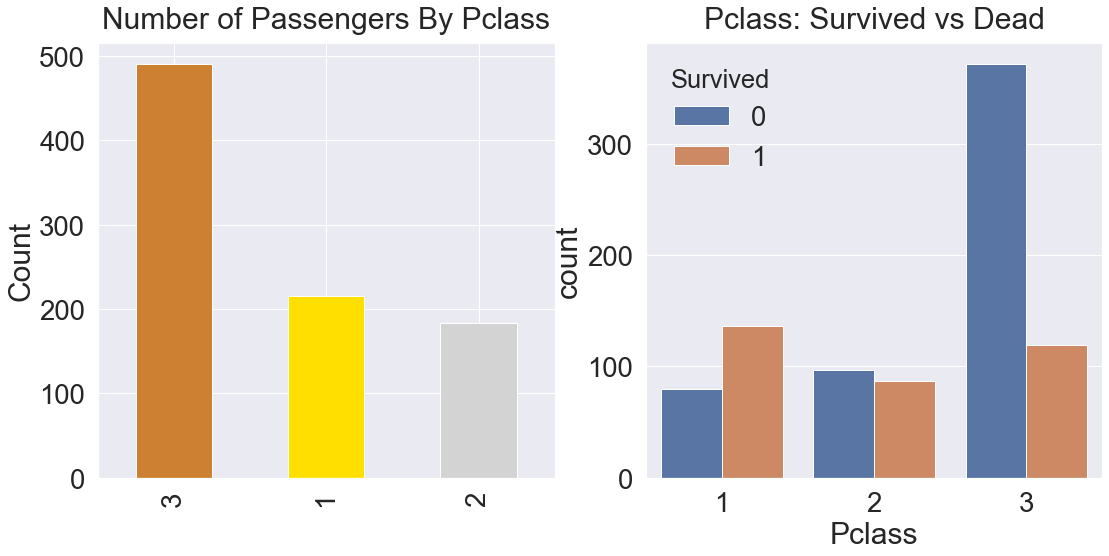

In [20]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 좋을 수록 생존 확률이 높다
- 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단

## 2.2 Sex
- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인
- pandas groupby 와 seaborn countplot 을 사용해서 시각화

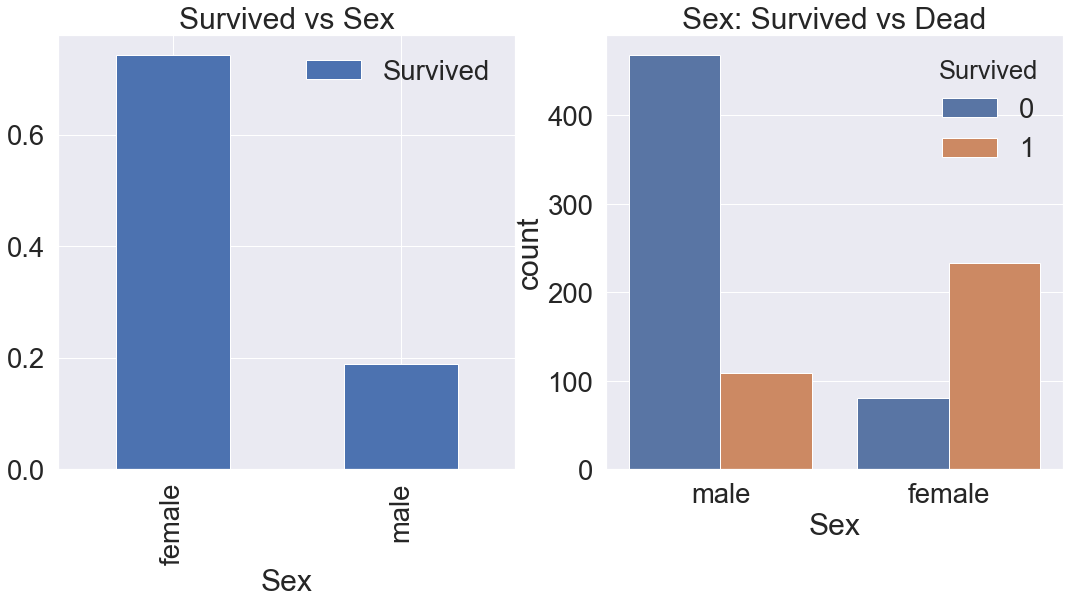

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 생존 확률이 높다

In [22]:
# ascending 트루이면 인덱스 숫자가 1인게 위로 올라간다
# 펄스이면 인덱스 숫자가 0인게 위로 올라간다
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=True)

Sex  Survived
1    male  0.188908
0  female  0.742038

In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)\
.style.background_gradient(cmap='summer_r')

Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다

## 2.3 Both Sex and Pclass
- 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

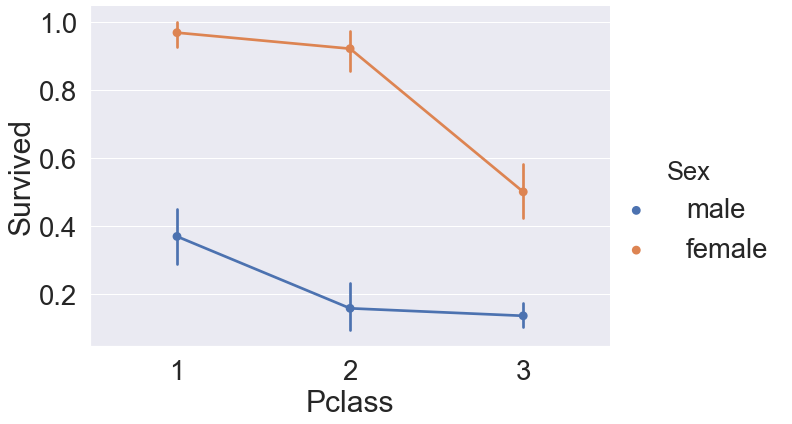

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=1.5)

- 모든 클레스에서 여자의 생존률이 더 높다
- 남녀 상관 없이 클레스가 높을 수록 생존 확률이 높다

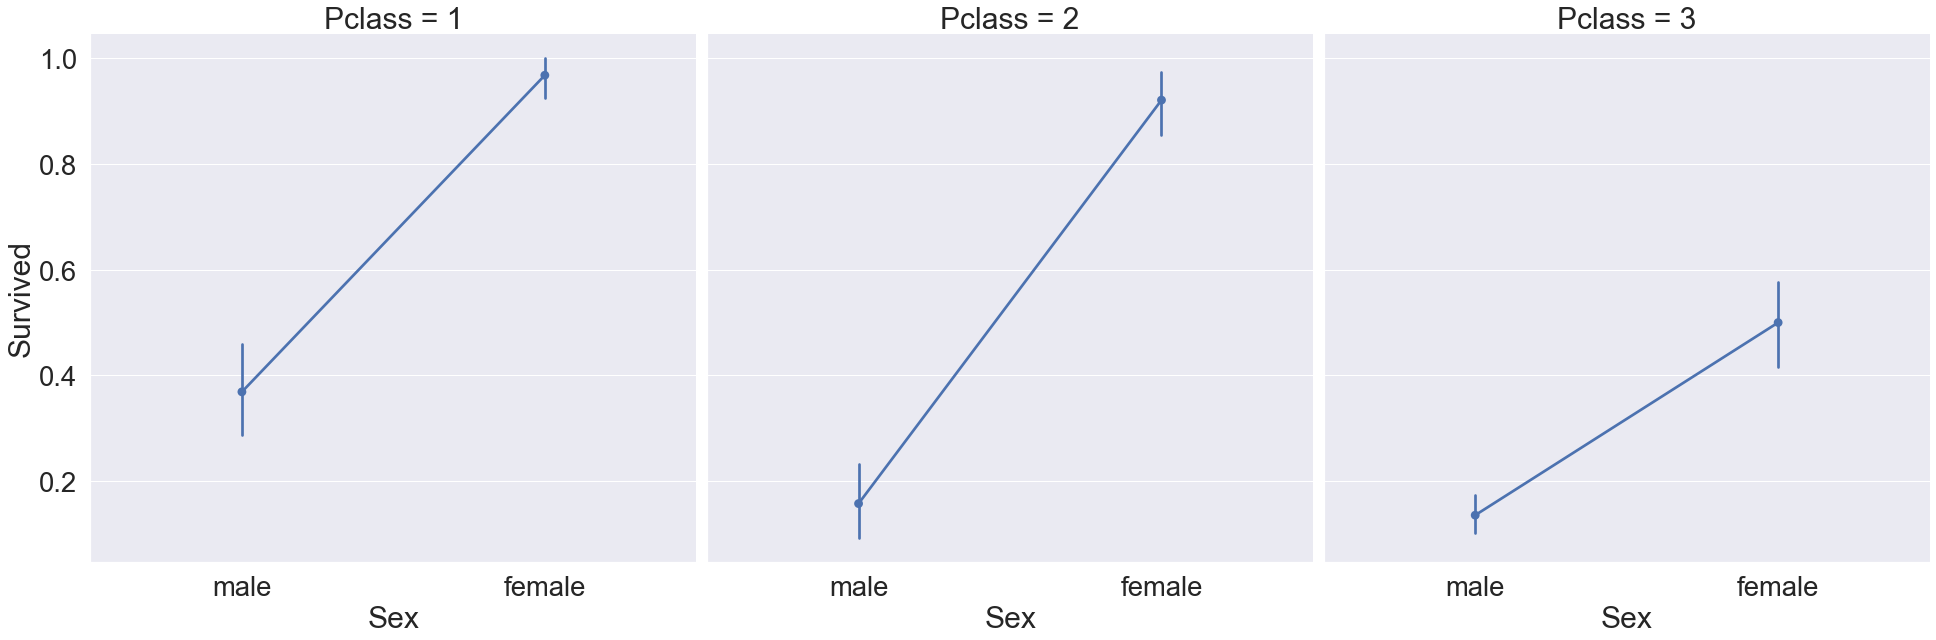

In [27]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

- 위 그래프는 hue대신 column으로 표를 만든것이다

## 2.4 Age
- Age feature 살펴보기

In [29]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객:{:.1f} Years'.format(df_train['Age'].min()))
print('탐승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객:0.4 Years
탐승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram

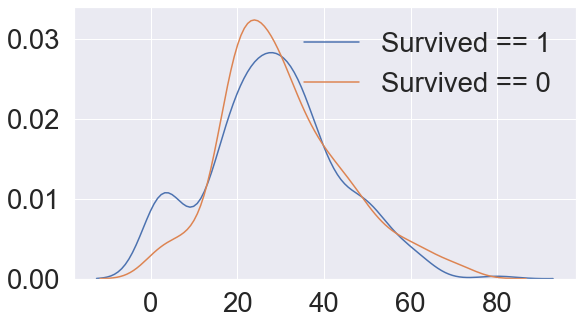

In [34]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax) # 생존자 선
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax) # 사망자 선
plt.legend(['Survived == 1', 'Survived == 0'])  # 각 선의 설명
plt.show() # 그래프 출력

- 나이가 어린 경우가 생존자가 더 많다

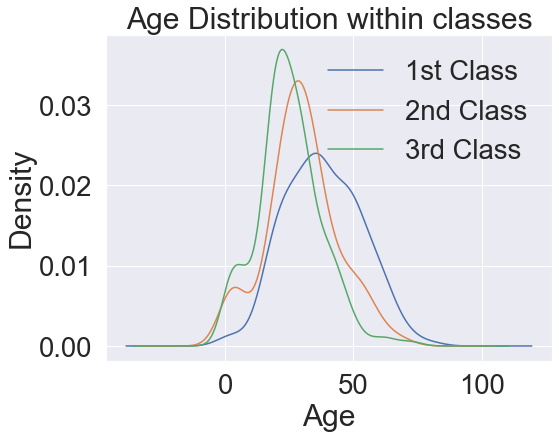

In [40]:
# 클레스에 따른 나이 분배
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class']) 

########################################
# Q. 위의 df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
# 입력 순서대로 출력이 되는가?

- class가 높을 수록 연장자가 많다
- 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 한다
- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인

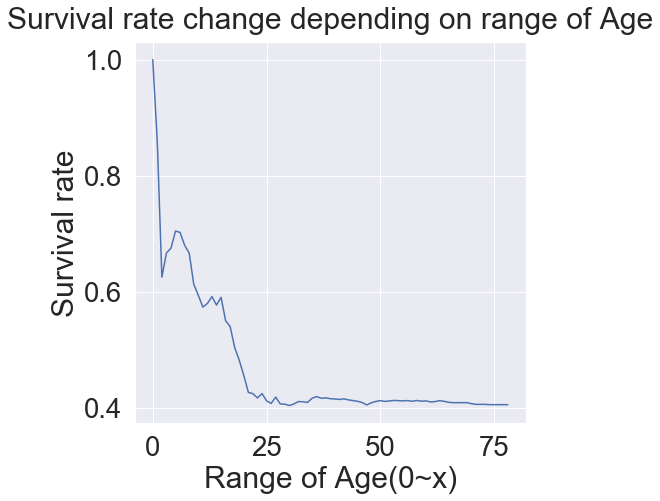

In [44]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived']\
    .sum()/ len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02) 
# Q.y=1.02의 역할은 무엇?
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 높다
- 나이를 중요한 feature로 사용 가능하다

## 2.5 Pclass, Sex, Age
- Sex, Pclass, Age, Survived 모두에 대해서 보고싶을 때, seaborn 의 *violinplot 사용*
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age)

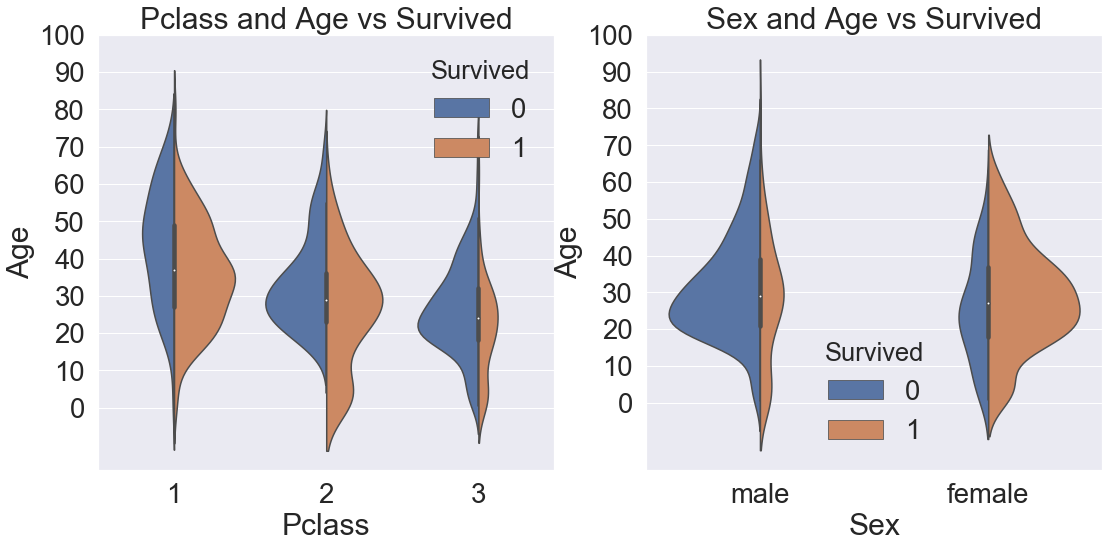

In [58]:
# 그래프 기본 설정
f,ax = plt.subplots(1,2,figsize=(18,8))

# 그래프1
sns.violinplot('Pclass','Age',hue='Survived', data=df_train,scale='count',split=True,ax=ax[0])
# split을 False로 하면 Survived 값이 분리되어 나온다
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # y의 범위값

# 그래프2
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
# split을 False로 하면 Survived 값이 분리되어 나온다
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10)) # y의 범위값
plt.show()

# Q. scale='count'는 무엇?

- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

## 2.6 Embarked
- Embarked 는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

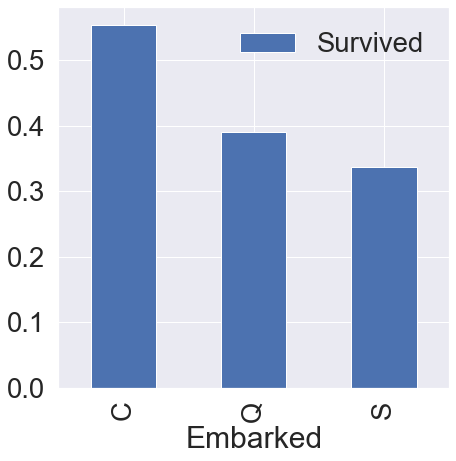

In [57]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)
#ascending=False는 내림차순을 의미
#ascending=True는 오름차순을 의미

- C가 생존률이 제일 높다

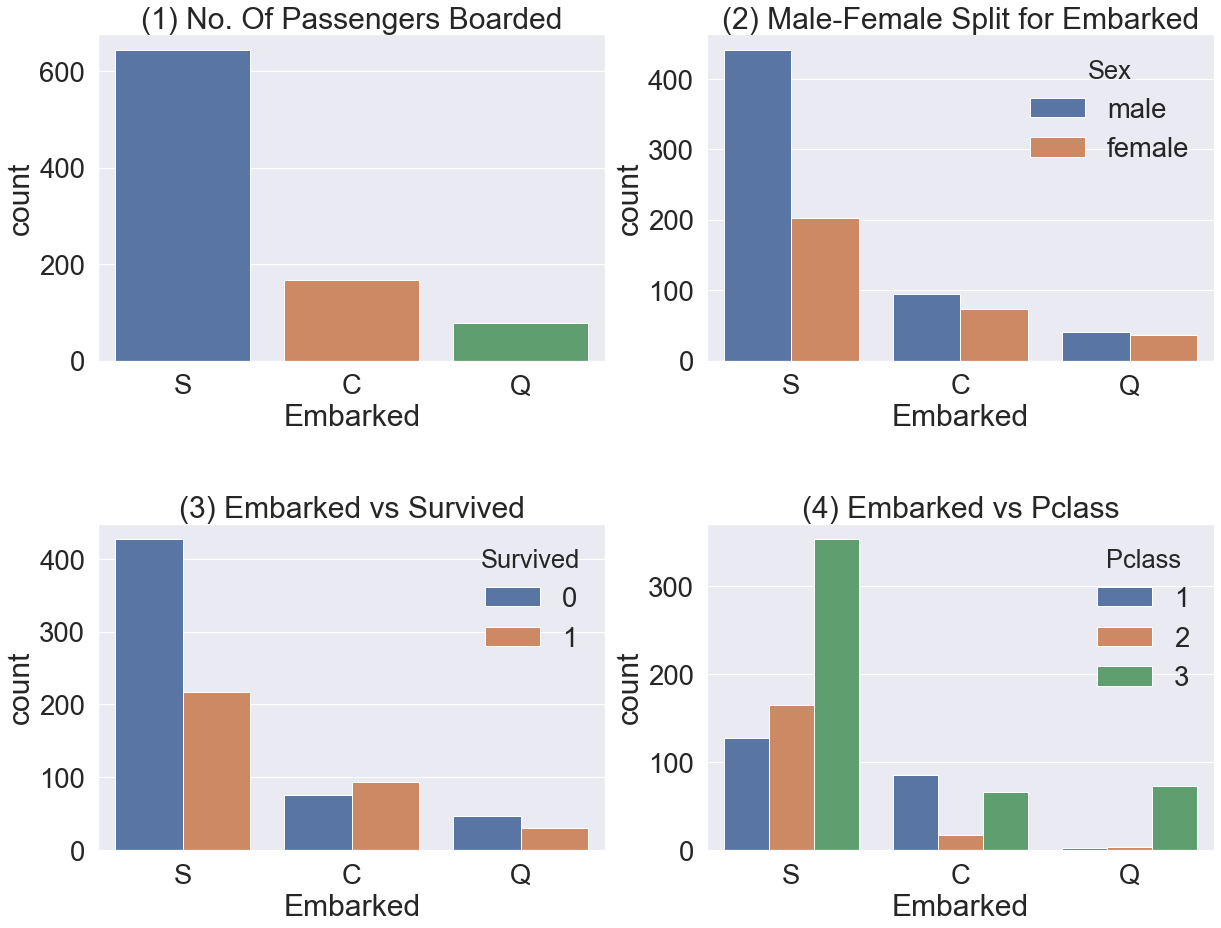

In [61]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()